Author: Rishabh SONI

Student ID: 22013485



## **COMP6685 Deep Learning Coursework A1**


Individual (50% of total mark)


**TASK:**	You are required to develop a phyton code with appropriate comments and answer questions.

**Description**: Create a code using this temlate to train a Convolutional Neural Network (CNN) on the fashion MNIST dataset available at https://keras.io/api/datasets/fashion_mnist/ . 

Fashion MNIST is a dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images.

The dataset should be imported in the code and one sample image should be visualised before applying the model.

Define a CNN and comment the chosen parameters of the network. Apply a regularization method (L1, L2 or L1L2). Divide the dataset into training, validation and test set. Obtain the accuracy on the validation set and plot the final results using the data from the test set. Comment your lines of code appropriately to explain your solution.

Enhance the model's performance to obtain the best or optimal validation accuracy. Further questions about final remarks on the results will be answered on the markdown defined in the template.

---
---

Note: This is only a template. You can add more code/text cells if necessary.

In [15]:
import tensorflow as tf
from keras import datasets, layers, models, regularizers, utils
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statistics
from sklearn.model_selection import train_test_split




Import the dataset and divide it into training, validation and test sets. Explain how you obtained the validation set. How did you choose the size of the validation set? **(10 marks)**

---

In [16]:
# Load the data
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

# Split the training data into training and validation sets
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

# Considering them as a float
train_images = train_images.astype('float32')
val_images = val_images.astype('float32')
test_images = test_images.astype('float32')

# Reshaping for [28*28*1] 
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
val_images = val_images.reshape(val_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

# Normalising the Data
train_images = train_images/255
val_images = val_images/255
test_images = test_images/255

# Changes the classes from 0-9 into Binary (0,1)
train_labels = utils.to_categorical(train_labels, 10)
val_labels = utils.to_categorical(val_labels, 10)
test_labels = utils.to_categorical(test_labels, 10)

**Anwers:**

I loaded the data from the keras datasets and then loaded them into the training and test data. Then I obtained the validation set using the ``train_test_split`` function. In this function I decided to use an 80:20 split for training and validation. This was decided over any other splits because a large validation size would increase the reliability of the model performance but would leave less data for training the model. This meant 20% of the original training data was a balanced option.The random_state parameter is set to 42 for reproducibility, meaning the same random split will be obtained each time the code is run.
I then converted these images to a float. Then this is reshaped to be more compatible with the CNN by adding an additional dimention for the grayscale image. 
To normalise the data, each pixel value is divided by 255, to scale the values between 0 and 1.

Visualise a random sample image of the dataset. **(10 marks)**

---



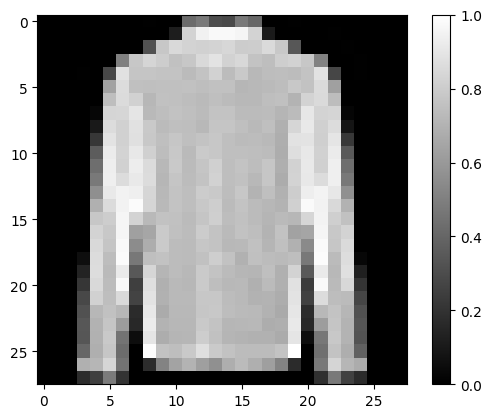

In [17]:
# Choose a random index
random_index = np.random.choice(train_images.shape[0])

# Select the corresponding image
random_image = train_images[random_index]
# print(str(random_image))
# Plot the image
plt.figure()
plt.imshow(random_image,cmap='gray')
plt.colorbar()
plt.show()

Define your CNN model. Specify the network and training parameters and comment them. **(10 marks)**

---

In [18]:
# regularisation weight
reg_weight = 1e-6

# Creating a sequential model
model = models.Sequential()

# Added 2D convolution layer: 32 filters, a 3x3 kernel, relu activation function, input shape of (28, 28, 1),same padding, and L2 regularisation
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1), kernel_regularizer=regularizers.l2(reg_weight)))
# Added max pooling layer to reduce the spatial dimensions of output volume
model.add(layers.MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(layers.Dropout(0.2))

# Added 2D convolution layer: 64 filters, a 3x3 kernel, relu activation function, same padding, and L2 regularisation
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(reg_weight)))
# Added max pooling layer to reduce the spatial dimensions of output volume
model.add(layers.MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(layers.Dropout(0.2))

# Added 2D convolution layer: 128 filters, a 3x3 kernel, relu activation function, same padding, and L2 regularisation
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(reg_weight)))
# Added max pooling layer to reduce the spatial dimensions of output volume
model.add(layers.MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(layers.Dropout(0.2))

# Flatten the tensor output from the previous layer into a single long feature
model.add(layers.Flatten())

# Add a dense layer with 64 neurons and relu activation function
model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(reg_weight)))
model.add(layers.Dropout(0.2))
# Add a dense layer with 10 neurons (one for each class) and softmax activation function for multiple classes classification(not sigmoid)
model.add(layers.Dense(10,activation="softmax", kernel_regularizer=regularizers.l2(reg_weight)))

# Compile the model with the Adam optimizer, categorical crossentropy as the loss function, and accuracy as the metric
model.compile(optimizer='adam',
              loss="categorical_crossentropy",
              metrics=['accuracy'])
# Print a summary of the model
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 dropout_9 (Dropout)         (None, 7, 7, 64)         

Train the CNN model. **(10 marks)**

---

Epoch 1/20
375/375 [==============================] - 11s 26ms/step - loss: 0.6982 - accuracy: 0.7396 - val_loss: 0.3903 - val_accuracy: 0.8552
Epoch 2/20
375/375 [==============================] - 10s 26ms/step - loss: 0.4185 - accuracy: 0.8482 - val_loss: 0.3385 - val_accuracy: 0.8772
Epoch 3/20
375/375 [==============================] - 9s 25ms/step - loss: 0.3580 - accuracy: 0.8710 - val_loss: 0.2922 - val_accuracy: 0.8939
Epoch 4/20
375/375 [==============================] - 9s 25ms/step - loss: 0.3223 - accuracy: 0.8820 - val_loss: 0.2803 - val_accuracy: 0.8963
Epoch 5/20
375/375 [==============================] - 9s 25ms/step - loss: 0.3015 - accuracy: 0.8907 - val_loss: 0.2596 - val_accuracy: 0.9044
Epoch 6/20
375/375 [==============================] - 10s 26ms/step - loss: 0.2825 - accuracy: 0.8980 - val_loss: 0.2425 - val_accuracy: 0.9136
Epoch 7/20
375/375 [==============================] - 10s 27ms/step - loss: 0.2670 - accuracy: 0.9020 - val_loss: 0.2343 - val_accuracy: 0.

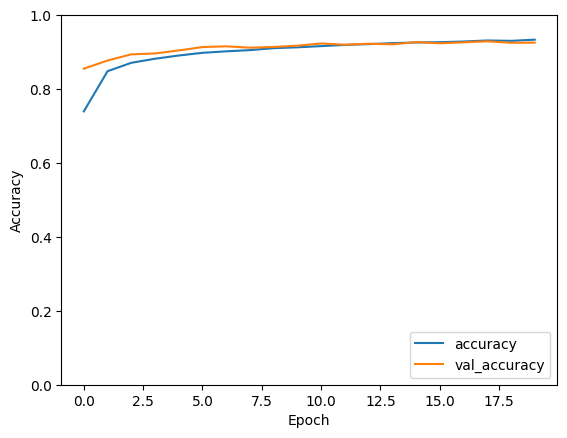

In [19]:
# Train the model for 20 epochs and a batch size of 128 with validation
history = model.fit(train_images, train_labels, epochs=20, batch_size=128,verbose=1,
                    validation_data=(val_images, val_labels))




# Plot the accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

Evaluate your model. What is the best/highest validation accuracy your network achieved? How did you obtain this accuracy? **(10 marks)**


In [20]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)
# Get the highest validation accuracy
max_val_acc = max(history.history['val_accuracy'])
print(f"Best/Highest validation accuracy: {max_val_acc}")
print(f"Best/Highest validation accuracy percentage: {max_val_acc * 100:.2f}%")
# print(statistics.mean(history.history['val_loss'])) 

313/313 [==============================] - 1s 4ms/step - loss: 0.2343 - accuracy: 0.9207
Best/Highest validation accuracy: 0.9291666746139526
Best/Highest validation accuracy percentage: 92.92%


**Answer:**

The highest Validation Accuracy I ever achieved through testing was 93.56%

How did I obtain this accuracy:

I added L2 regularization into my model with a regularization strength of 1e-6. 
This regularization technique helps prevent overfitting by adding a penalty term to the weights, through experimentation I found that 1e-6 was the optimal value.
When increasing the value for the L2 regularization, there is a negative impact on the validation accuracy by roughly 0.1% on average.
I also added 4 dropouts to my model which randomly set a fraction of input neurons to 0 at each update during training time. 
I experimented with different dropout rates and found that a dropout rate of 0.2 yielded the best results. 
Any higher dropout rate resulted in a minor dip in validation accuracy, averaging around 0.1%.
To get the highest validation accuracy achieved during training, I used the max function in Python to get the best validation accuracy from the training history.

Plot the final results on the test set and print the accuracy/loss on that set. **(10 marks)**

---

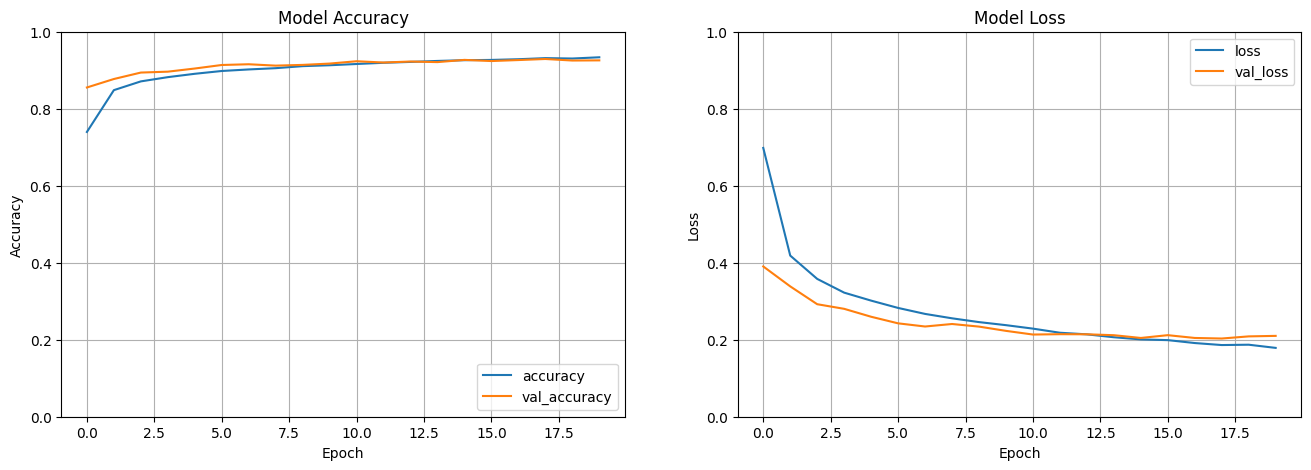

Test accuracy: 92.07%
Test loss: 23.43%


In [21]:
# Plotting accuracy
plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.grid(True)
plt.ylim(0, 1)

# Plotting loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.grid(True)
plt.ylim(0, 1)
plt.show()

# This is assuming that validation is considered as the test data as it is the test data when doing model.fit

print(f"Test accuracy: {test_acc * 100:.2f}%")
print(f"Test loss: {test_loss * 100:.2f}%")

Additional questions:


*   Describe whether you found any differences in the network’s accuracy when applying regularisation compared to not applying it. If there were differences, which regularisation did you use? If no differences were found, what could be the reason? **(10 marks)**

**Answer:**

When I used no regulation the highest validation accuracy achieved was around 92.83% and the test accuracy was around 92.22%. When I used  L1 regularisation with different values (1e-5, 1e-4, 1e-6), the highest validation accuracy achieved was around 92.89% (with L1 1e-6) and the test accuracy was around 92.48%. It seems that L1 regularisation with a smaller value (1e-6) performed slightly better than with larger values. When using the L2 regularisation with different values (1e-6, 1e-5, 1e-4), the highest validation accuracy achieved was around 92.93% (with L2 1e-6) and the test accuracy was around 92.03%. Similar to L1, L2 regularisation with a smaller value (1e-6) performed slightly better than with larger values. Overall, using regularisation gave very minor differences in the already high accuracies, this might suggest that my model was not overfitting the training data much, to begin with. From my understanding regularisation is a method used to prevent overfitting by adding a penalty to the weights. I initially thought that adding dropouts to my model caused these results but even removing them didn't yield any differing results other than impacting the loss, this may indicate that my model’s capacity was already well-suited to the complexity of the Fashion MNIST dataset, so adding regularisation did not lead to a significant improvement in accuracy. I ended up using L2 with 1e-6 weight and dropouts which offered the most optimal results for both test and validation accuracies.


*   Write your conclusions about the results achieved with your model on the fashion MNIST dataset and ideas to improve these results/performance further. **(10 marks)**

**Answer:**

Based on the results, My model achieved a high validation and test accuracy on the Fashion MNIST dataset on average it has a validation accuracy of 93% and a test accuracy of 92% .This suggests that my model is able to learn from the training data and generalise well to unseen data.The model architecture: multiple convolutional layers, max pooling layers, dropout layers, and dense layers, seems to be effective for Fashion MNIST task. The use of dropout and L2 regularisation helped to minimise overfitting and improve the model’s performance. To further improve these results/performance I could implement `early-stopping` which could prevent overfitting as this stops the training process when the performance on the validation sets starts to worsen. I could also explore other regularisation such as Max-Norm regularisation to see how my model would behave.I would also try training multiple models independently and then combine their predictions,as this can lead to better performance because they average out biases, reduce variance, and are less likely to overfit.I could also use data augmentation methods which helps the model performance by increasing the diversity and size of the training dataset, enhancing the model's ability to generalise and sensitivity towards complex features.

---

Additional remarks:

*   Code outline appropriately commented. **(10 marks)**
*   Code running without errors. **(10 marks)**

---

